In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ctrace
from ctrace.simulation import *

In [23]:

with open(ctrace.PROJECT_ROOT /"output"/"saved_timer[apkhS]" / "results.csv", "r") as csv:
    df = pd.read_csv(csv)
df

,G,method,from_cache,budget,p,value,isOptimal,maxD,I_size,v1_size,v2_size,num_cross_edges,duration
0,montgomery,dependent,ca15.json,400,0.078,626.777878,-1,28,1217,6233,11135,16931,1.539760
1,montgomery,dependent,nb15.json,400,0.078,801.059333,-1,27,1584,7527,12026,19278,1.869258
2,montgomery,dependent,ta16.json,400,0.078,274.875696,-1,28,609,3182,7326,10008,0.560445
3,montgomery,dependent,sb14.json,400,0.078,1341.168431,-1,31,2393,11016,13992,25342,2.309932
4,montgomery,dependent,jb14.json,400,0.078,1334.244162,-1,30,2465,10920,13625,24940,2.355205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,montgomery,weighted,tb9.json,1000,0.078,5690.014640,-1,36,4813,30861,21639,79679,6.498309
4196,montgomery,weighted,nb10.json,1000,0.078,5845.476593,-1,35,5208,31047,21245,76873,9.881173
4197,montgomery,weighted,jb11.json,1000,0.078,5371.153971,-1,22,5989,28350,16983,48541,9.540632
4198,montgomery,weighted,db9.json,1000,0.078,5759.696541,-1,35,4562,31546,23369,90271,7.570140


<AxesSubplot:xlabel='I_size', ylabel='duration'>

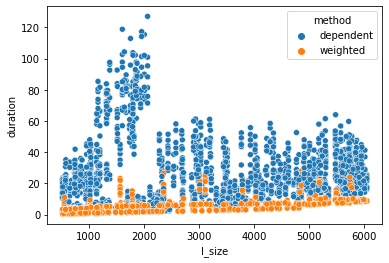

In [24]:
sns.scatterplot(data=df, x="I_size", y="duration", hue="method")

In [20]:
table = pd.pivot_table(df, values=['duration'], index=['budget'], columns=['method'], aggfunc=np.average)
table

duration          
method  dependent  weighted
budget                     
400     27.398361  5.892873
500     27.751889  6.098311
600     27.626846  5.942613
700     25.838158  5.720951
800     22.203002  5.595258
900     22.199359  5.627238
1000    22.281198  5.753643

In [21]:
# Compute different sizes of I
json_dir = PROJECT_ROOT / "data" / "SIR_Cache" / "time_trials"
cache_paths = [f for f in json_dir.iterdir()]
len(cache_paths)

594

In [16]:
from ctrace.dataset import load_sir_path
size_dicts = {}
for path in cache_paths:
    SIR = load_sir_path(path, merge=True)
    filename = path.name
    size_dicts[filename] = len(SIR["I"])


In [6]:
df["I_size"] = [size_dicts[i] for i in df["from_cache"]]

In [7]:
df.to_csv("time_trial_sizes.csv")

In [8]:
filtered = {i: df[df["budget"] == i] for i in range(400, 1001, 100)}

In [9]:
filtered[400]

,G,method,from_cache,budget,p,value,isOptimal,maxD,I_size,v1_size,v2_size,num_cross_edges,duration
0,montgomery,dependent,ca15.json,400,0.078,626.777878,-1,28,1217,6233,11135,16931,1.539760
1,montgomery,dependent,nb15.json,400,0.078,801.059333,-1,27,1584,7527,12026,19278,1.869258
2,montgomery,dependent,ta16.json,400,0.078,274.875696,-1,28,609,3182,7326,10008,0.560445
3,montgomery,dependent,sb14.json,400,0.078,1341.168431,-1,31,2393,11016,13992,25342,2.309932
4,montgomery,dependent,jb14.json,400,0.078,1334.244162,-1,30,2465,10920,13625,24940,2.355205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,montgomery,weighted,tb9.json,400,0.078,5892.028663,-1,36,4813,30861,21639,79679,7.052685
599,montgomery,weighted,nb10.json,400,0.078,6044.632050,-1,35,5208,31047,21245,76873,9.588604
600,montgomery,weighted,db9.json,400,0.078,5965.991595,-1,35,4562,31546,23369,90271,7.541430
602,montgomery,weighted,jb11.json,400,0.078,5582.012798,-1,22,5989,28350,16983,48541,8.982742


<AxesSubplot:xlabel='I_size', ylabel='duration'>

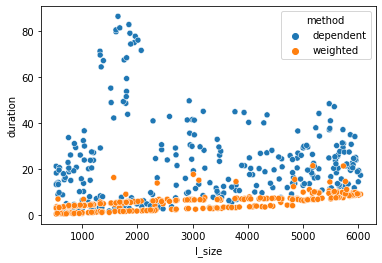

In [10]:
sns.scatterplot(data=filtered[800], x="I_size", y="duration", hue="method")

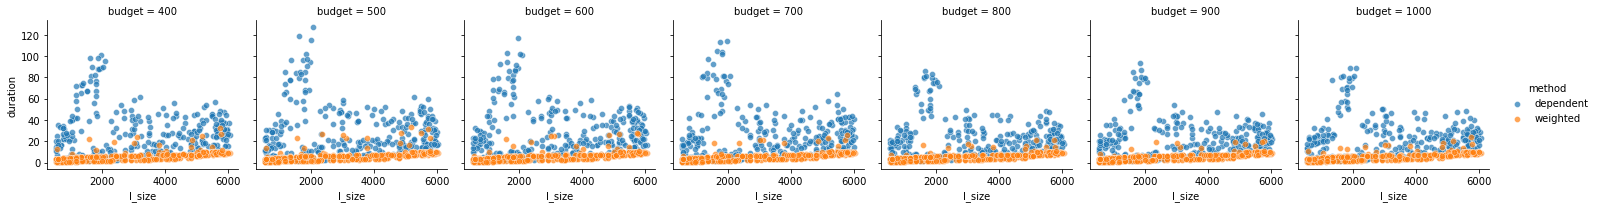

In [11]:
g = sns.FacetGrid(df, col="budget", hue="method")
g.map(sns.scatterplot, "I_size", "duration", alpha=.7)
g.add_legend()

<AxesSubplot:xlabel='from_cache', ylabel='value'>

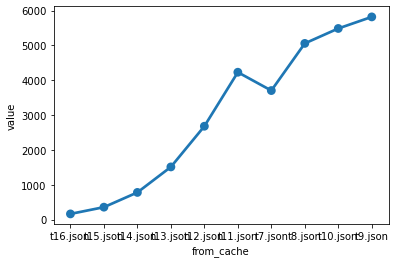

In [14]:

sns.pointplot(data=df, x="from_cache", y='value', ci=95)
